# 9. K means Clustering

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset = pd.read_csv(r'D:\Project Data Set\New_Iris.csv')
dataset.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidt
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


<Figure size 600x400 with 0 Axes>

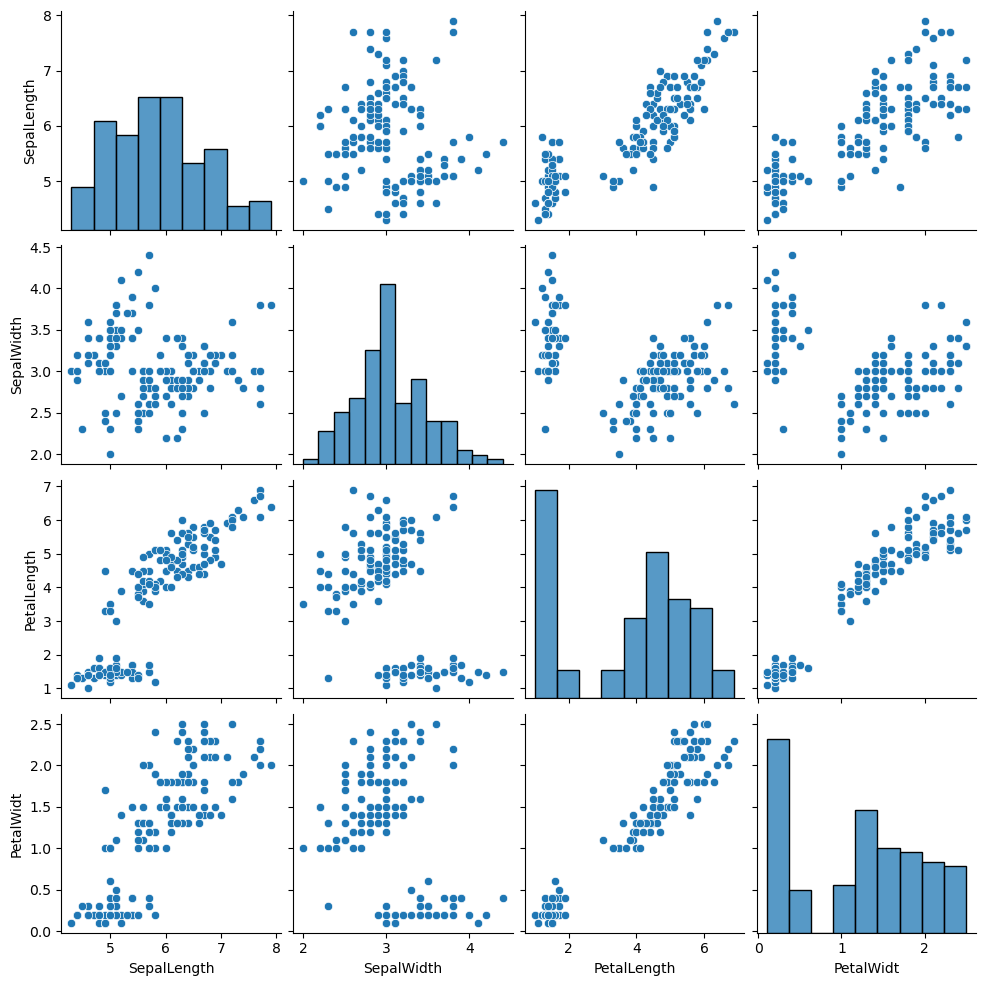

In [7]:
plt.figure(figsize=(6,4))
sns.pairplot(data=dataset)
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss = [] 

for i in range(2,21):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)

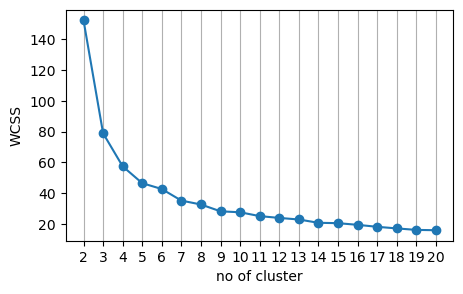

In [10]:
plt.figure(figsize=(5,3))
plt.plot([i for i in range(2,21)],wcss, marker='o')
plt.xlabel("no of cluster")
plt.xticks([i for i in range(2,21)])
plt.ylabel("WCSS")
plt.grid(axis="x")
plt.show()

#### on 2nd marker we can see that it's staring to  stip downward. So 2nd point is the elbow point. itmeets at point 3 on x axis. 
## So n_cluster value comes as 3

In [11]:
kmn = KMeans(n_clusters=3)
dataset["Predict"]= kmn.fit_predict(dataset)

<Figure size 500x400 with 0 Axes>

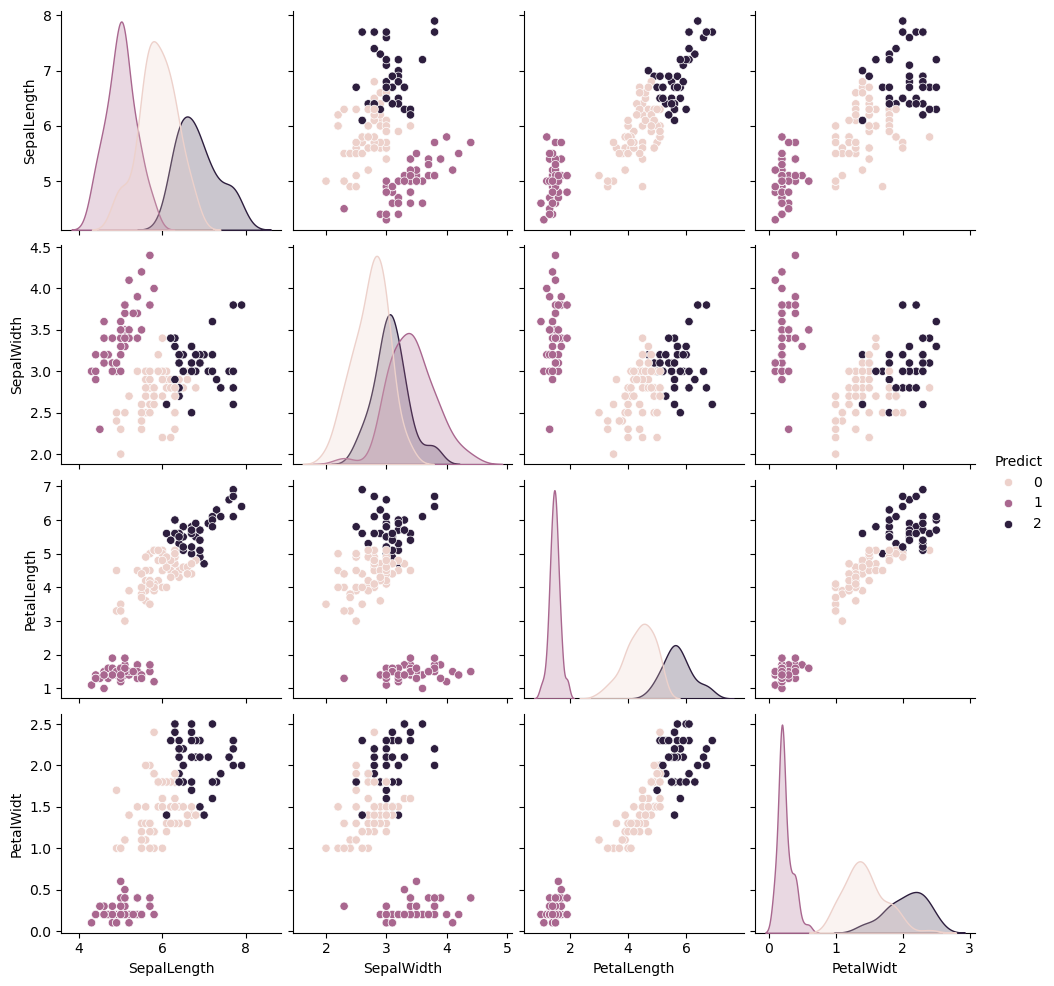

In [12]:
plt.figure(figsize=(5,4))
sns.pairplot(data=dataset, hue="Predict")
plt.savefig('predict.jpg')
plt.show()

### Compare Revised dataset with org dataset with 'species' available
Here Species  wil be Hue

In [13]:
org_dataset = pd.read_csv(r'D:\Project Data Set\Iris_org\Iris.csv')
org_dataset.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


<Figure size 500x400 with 0 Axes>

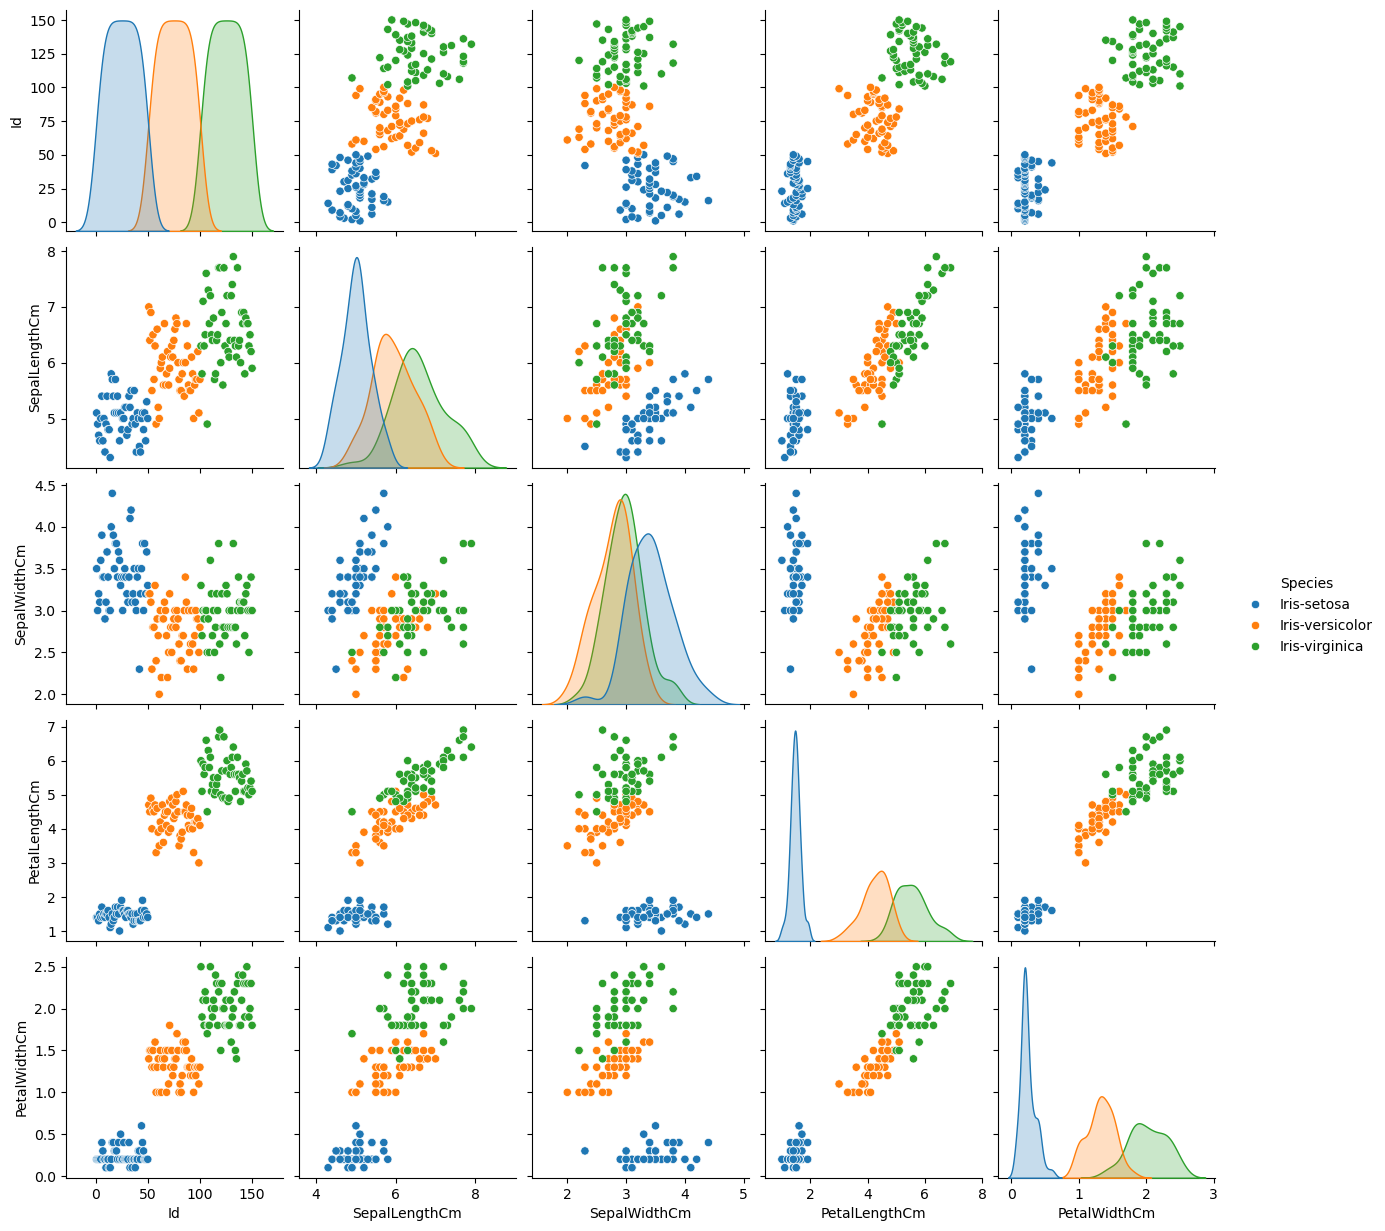

In [14]:
plt.figure(figsize=(5,4))
sns.pairplot(data=org_dataset, hue="Species")
plt.savefig("org.jpg")
plt.show()

#### 90% clustering is correct. 
Hence, if we have any unlabelled dataset we can find the Cluster with 'KMean Clustering'.

# Silhouette Score

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [19]:
silhouette_score(dataset, labels=kmn.labels_)  # now here not sure if the cluster we applied is correct. So use Loop instead

0.6844657470953512

In [22]:
ss=[]
no_c = [j for j in range(2,21)]  # no_c = no of cluster
for i in range(2,21):
    km1 = KMeans(n_clusters=i)
    km1.fit(dataset)
    ss.append(silhouette_score(dataset, km1.labels_))

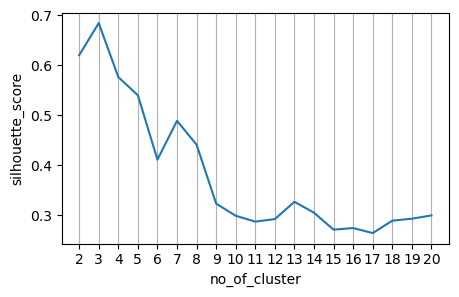

In [29]:
plt.figure(figsize=(5,3))
plt.plot(no_c,ss)
plt.xlabel('no_of_cluster')
plt.ylabel('silhouette_score')
plt.xticks(no_c)
plt.grid(axis='x')
plt.show()

#### max Silhoutte_score comes at no_of_cluster = 3. so 3 no of clusters are here